In [ ]:
Nama: Nella Aprilia
NIM: 1103210185
Tugas 2: Logistic Regression Model
Overview:

Dokumentasi GPT : https://chat.openai.com/share/d0098df3-92ae-4b78-b715-c2ef4471d455

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
Akurasi: 0.9850746268656716
Confusion Matrix:
[[30  1  0]
 [ 0 18  0]
 [ 0  0 18]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


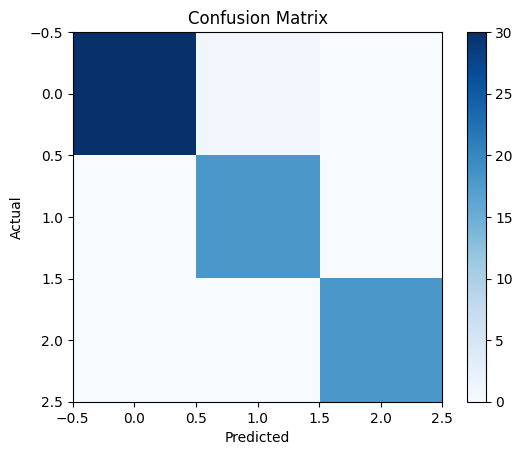

In [17]:
# Impor library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Memuat dataset Palmer Penguins
penguins_data = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")

# Menampilkan informasi dataset
print(penguins_data.head())

# Menghapus baris dengan nilai yang hilang
penguins_data.dropna(inplace=True)

# Membuat LabelEncoder untuk mengkodekan label kategori menjadi bilangan bulat
label_encoder = LabelEncoder()
penguins_data['species'] = label_encoder.fit_transform(penguins_data['species'])

# Memilih fitur yang akan digunakan
X = penguins_data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins_data['species']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Logistic Regression
model = LogisticRegression()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)

# Memprediksi kelas pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualisasi confusion matrix
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()